# Import Libraries

In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score



# Loading Data

In [9]:
df = pd.read_csv('IRIS.csv')

In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploring the Data

In [11]:
df.shape

(150, 5)

In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
df.duplicated().sum()

3

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(147, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [18]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualization

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
species_counts = df['species'].value_counts()
species_counts

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

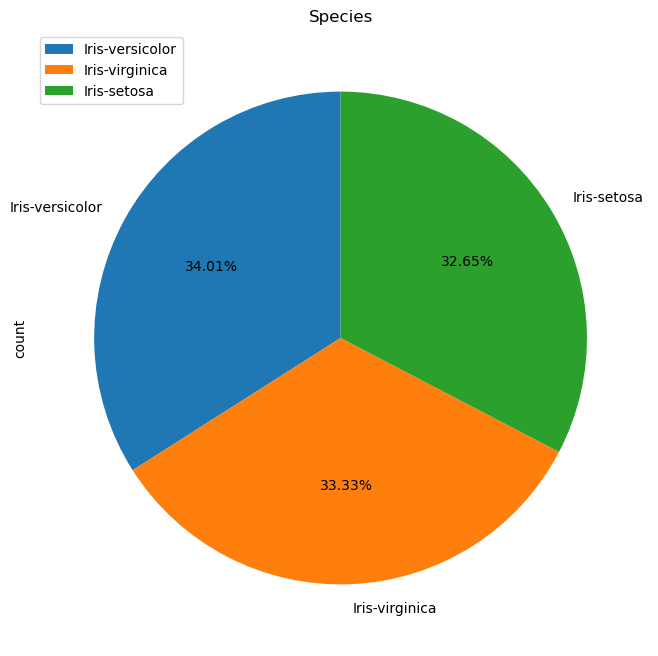

In [21]:
plt.figure(figsize=(8,8))
species_counts.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Species')
plt.legend(loc='upper left', labels=species_counts.index)
plt.show()

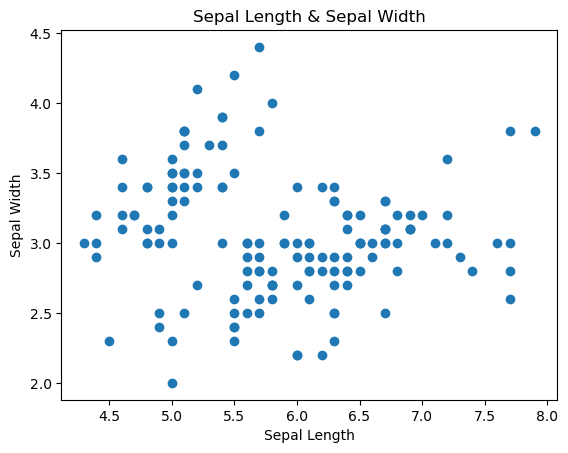

In [22]:
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length & Sepal Width')
plt.show()

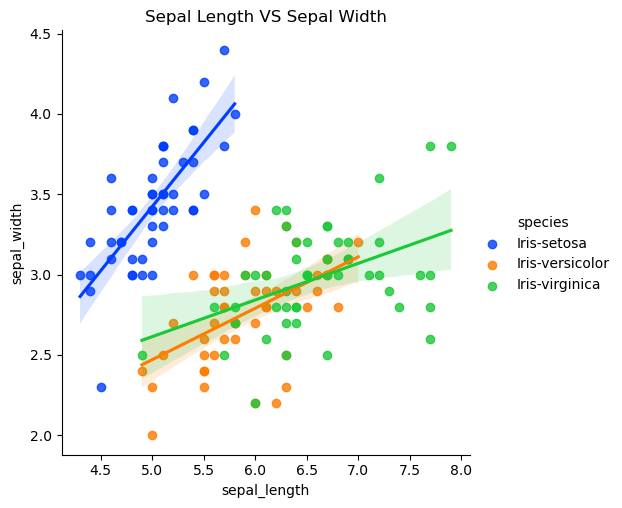

In [23]:
sns.lmplot(
    x="sepal_length",
    y="sepal_width",
    hue="species",
    palette="bright",
    data=df
)

plt.title("Sepal Length VS Sepal Width")
plt.show()

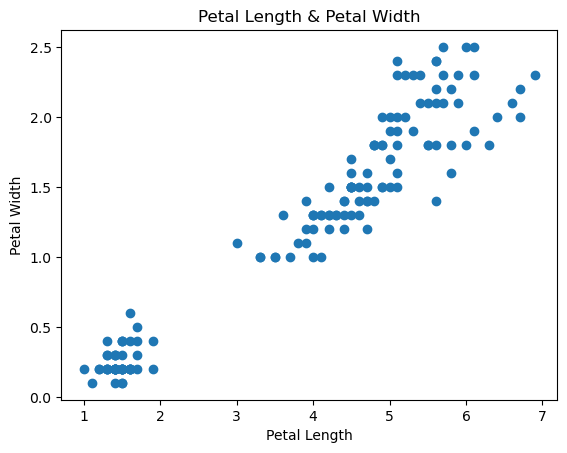

In [24]:
plt.scatter(df['petal_length'], df['petal_width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length & Petal Width')
plt.show()

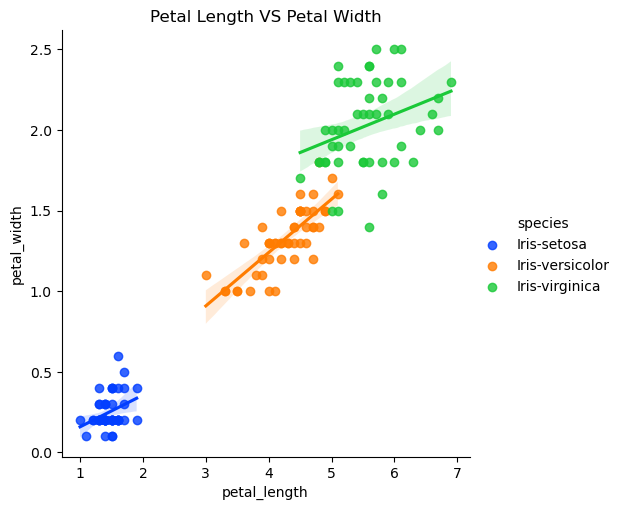

In [25]:
sns.lmplot(
    x="petal_length",
    y="petal_width",
    hue="species",
    palette="bright",
    data=df
)

plt.title("Petal Length VS Petal Width")
plt.show()

# Modeling

In [26]:
label = LabelEncoder()
df['species'] = label.fit_transform(df['species'])

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
x = df.drop('species', axis=1)
y = df['species']

In [29]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int32

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [32]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
89,5.5,2.5,4.0,1.3
145,6.7,3.0,5.2,2.3
14,5.8,4.0,1.2,0.2
85,6.0,3.4,4.5,1.6
77,6.7,3.0,5.0,1.7
...,...,...,...,...
26,5.0,3.4,1.6,0.4
91,6.1,3.0,4.6,1.4
67,5.8,2.7,4.1,1.0
82,5.8,2.7,3.9,1.2


In [33]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
127,6.1,3.0,4.9,1.8
122,7.7,2.8,6.7,2.0
51,6.4,3.2,4.5,1.5
118,7.7,2.6,6.9,2.3
106,4.9,2.5,4.5,1.7
81,5.5,2.4,3.7,1.0
53,5.5,2.3,4.0,1.3
115,6.4,3.2,5.3,2.3
58,6.6,2.9,4.6,1.3
138,6.0,3.0,4.8,1.8


In [34]:
y_train

89     1
145    2
14     0
85     1
77     1
      ..
26     0
91     1
67     1
82     1
143    2
Name: species, Length: 117, dtype: int32

In [35]:
y_test

127    2
122    2
51     1
118    2
106    2
81     1
53     1
115    2
58     1
138    2
134    2
92     1
39     0
121    2
23     0
45     0
147    2
40     0
43     0
65     1
108    2
2      0
110    2
130    2
41     0
148    2
56     1
119    2
30     0
72     1
Name: species, dtype: int32

In [36]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


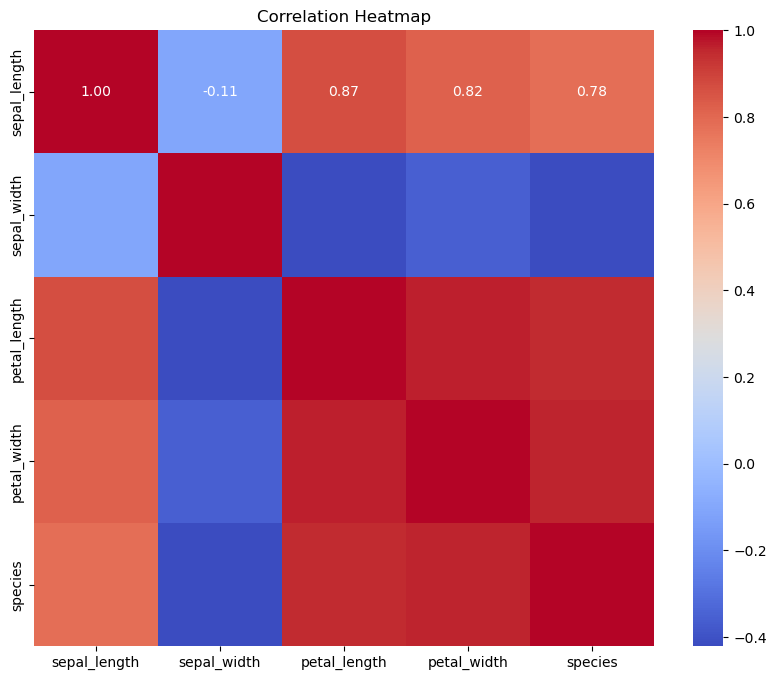

In [37]:
plt.figure(figsize=(10, 8))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [38]:
Logist = LogisticRegression(max_iter=10)

In [39]:
Logist.fit(x_train,y_train)

c:\Users\ebi\.conda\envs\abdul-enviroment\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

In [40]:
Logist.score(x_train, y_train)

0.9829059829059829

In [41]:
y_predict = Logist.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.9666666666666667

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
knn.score(x_train, y_train)

0.9914529914529915

In [46]:
y_predict = knn.predict(x_test)

In [47]:
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.9